In [10]:
import pandas as pd
import numpy as np

In [11]:
comments = pd.read_csv('Comments Corpus.csv')

In [14]:
comments.head()

,Unnamed: 0,0
0,0,Having to send your kids out there with no wea...
1,1,Respect ✊
2,2,I hope all the brave people finally win over t...
3,3,"If anybody here is reading this, my post at [h..."
4,4,Don't give up guys. Don't let Myanmar be anoth...


<Axes: >

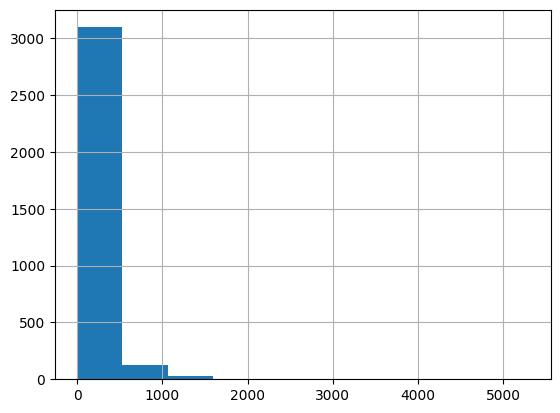

In [16]:
comments['0'].str.len().hist()

In [20]:
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

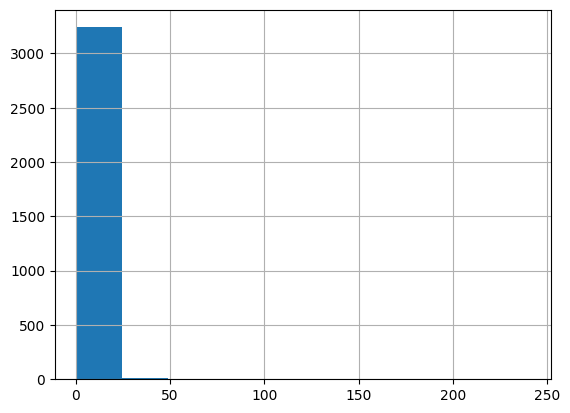

In [22]:
plot_word_length_histogram(comments['0'])

In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rachit0206/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
stop = set(stopwords.words('english'))
from matplotlib import pyplot as plt

In [28]:
corpus = []
new = comments['0'].str.split()
new = new.values.tolist()
corpus= [word for i in new for word in i]

from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [29]:
def plot_hist(dic):
    top = sorted(dic.items(), key = lambda x: x[1] , reverse = True)[:10]
    x , y = zip(*top)
    plt.bar(x , y)

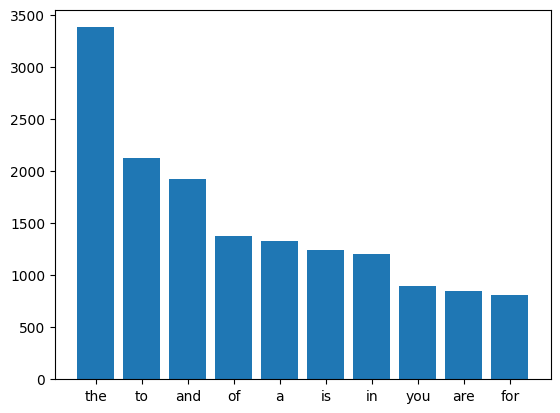

In [33]:
plot_hist(dic)

In [36]:
!pip install Counter

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for Counter: filename=Counter-1.0.0-py3-none-any.whl size=5411 sha256=45a9698b3c40117728a139af179ae4be5c9915a6bd92aba115d758355d292574
  Stored in directory: /home/rachit0206/.cache/pip/wheels/e3/02/6d/d5c0838427a060718c6060ae4d24da95a0e0df0d7a3dab8040
Successfully built Counter


<Axes: >

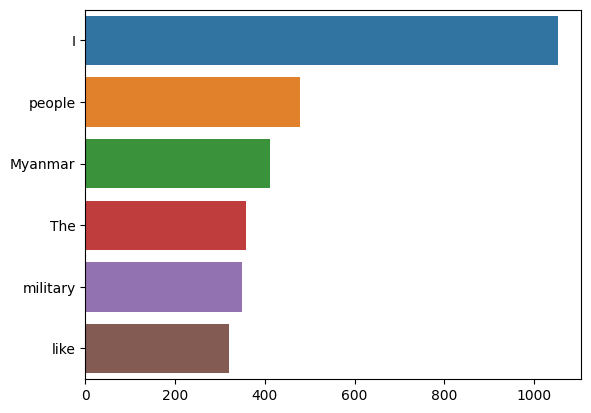

In [42]:
from collections import Counter
import seaborn as sns
counter = Counter(corpus)
most = counter.most_common()

x , y = [], []
for word, count in most[:40]:
    
    if(word not in stop):
        
        y.append(word)
        x.append(count)
sns.barplot(x = x , y = y)

In [49]:
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]


<Axes: >

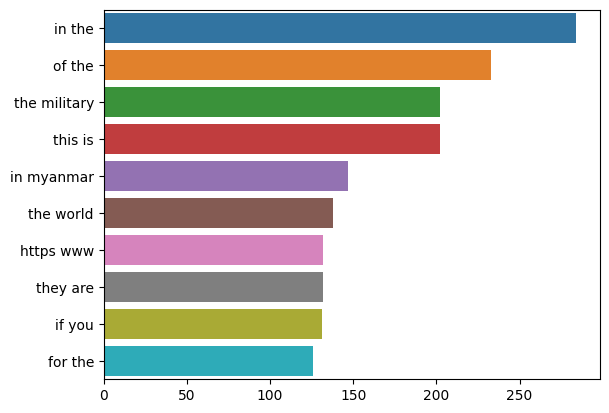

In [50]:
top_n_bigrams=get_top_ngram(comments['0'],2)[:10]
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<Axes: >

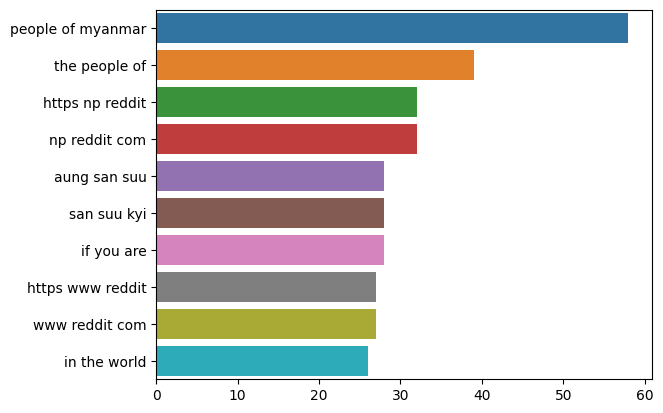

In [51]:
top_tri_grams = get_top_ngram(comments['0'] , n = 3)
y,x = map(list , zip(*top_tri_grams))
sns.barplot(x = x , y = y)

In [52]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/rachit0206/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/rachit0206/nltk_data...


True

In [61]:
from nltk.stem.porter import *
from nltk.stem.wordnet import *
from nltk.tokenize import word_tokenize

def preprocess(df):
    
    corpus = []
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    
    for comment in df['0']:
        
        words = [w for w in word_tokenize(comment) if (w not in stop)]
        words = [lem.lemmatize(w) for w in words if (len(w) > 2)]
        corpus.append(words)
        
    return corpus

In [62]:
corpus = preprocess(comments)

In [63]:
import gensim
dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(comm) for comm in corpus]

In [64]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 4,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.015*"people" + 0.012*"military" + 0.008*"n\'t" + 0.008*"The" + 0.007*"You" + 0.007*"Myanmar" + 0.005*"back" + 0.004*"fight" + 0.004*"one" + 0.004*"want"'),
 (1,
  '0.014*"Myanmar" + 0.011*"people" + 0.011*"n\'t" + 0.010*"http" + 0.009*"military" + 0.009*"country" + 0.008*"like" + 0.006*"China" + 0.006*"They" + 0.006*"would"'),
 (2,
  '0.016*"Myanmar" + 0.008*"n\'t" + 0.008*"people" + 0.007*"deleted" + 0.006*"The" + 0.006*"get" + 0.006*"They" + 0.006*"This" + 0.005*"think" + 0.005*"time"'),
 (3,
  '0.008*"like" + 0.007*"The" + 0.007*"people" + 0.007*"http" + 0.006*"Myanmar" + 0.005*"This" + 0.004*"would" + 0.004*"military" + 0.004*"n\'t" + 0.004*"need"')]

In [67]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.040238 -0.055071       1        1  33.092441
0     -0.035287 -0.027957       2        1  30.588048
2     -0.034304  0.085486       3        1  18.680694
3      0.109829 -0.002458       4        1  17.638817, topic_info=          Term        Freq       Total Category  logprob  loglift
49        http  232.000000  232.000000  Default  30.0000  30.0000
1419   deleted   58.000000   58.000000  Default  29.0000  29.0000
20     Myanmar  496.000000  496.000000  Default  28.0000  28.0000
76     removed   51.000000   51.000000  Default  27.0000  27.0000
1080       CCP   46.000000   46.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
509      think   19.542507  150.261224   Topic4  -6.0291  -0.3047
179       know   18.947789  156.645714   Topic4  -6.0600  -0.3772
317   anything   16.655197   70.929275   Topic4  -6.1889   0.2861
531      There   16.852813   93.849592   Topic4  -6.1771   0.0179
268       much   16.933485  117.717832   Topic4  -6.1724  -0.2039

[335 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
934       1  0.493485   're
934       2  0.364750   're
934       3  0.085824   're
934       4  0.053640   're
345       1  0.290188   ...
...     ...       ...   ...
1862      4  0.772978   미얀마
1863      4  0.861043  미얀마의
1884      4  0.773000   비폭력
1950      4  0.773011  있습니다
1980      4  0.860992  주십시요

[583 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

In [68]:
from wordcloud import WordCloud, STOPWORDS

In [70]:
corpus

[['Having',
  'send',
  'kid',
  'weapon',
  'knowing',
  'facing',
  'inhumane',
  'scum',
  'gun',
  'grenade',
  'literally',
  'heart',
  'wrenching',
  'Respect',
  'brave',
  'parent',
  'Their',
  'sacrifice',
  'unmeasurable'],
 ['Respect'],
 ['hope',
  'brave',
  'people',
  'finally',
  'win',
  'scum',
  'military',
  'best',
  'wish',
  'Myanmar',
  'fighting',
  'right',
  'democracy',
  'full',
  'support',
  'another',
  'human',
  'currently',
  'resident',
  'India'],
 ['anybody',
  'reading',
  'post',
  'http',
  '//www.reddit.com/r/pics/comments/m9dkwd/parents\\_in\\_myanmar\\_now\\_say\\_goodbye\\_to\\_their/',
  'http',
  '//www.reddit.com/r/pics/comments/m9dkwd/parents_in_myanmar_now_say_goodbye_to_their/',
  'gaining',
  'traction',
  'Perhaps',
  'Burmese',
  'native',
  'share',
  'voice',
  'comment',
  'Although',
  'Burmese',
  'unfortunately',
  'country',
  'since',
  'last',
  "'ve",
  'country',
  'bit',
  'touch',
  'Burmese',
  'internal',
  'affair']

In [75]:
!python3 -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 7.3 MB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [76]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [87]:
doc = nlp("Diu was liberated from Portuguese rule by the Indian government in 1961")

In [88]:
[(x.text , x.label_) for x in doc.ents]

[('Diu', 'PERSON'),
 ('Portuguese', 'NORP'),
 ('Indian', 'NORP'),
 ('1961', 'DATE')]

In [89]:
from spacy import displacy
displacy.render(doc , style = "ent")

/home/rachit0206/.local/lib/python3.10/site-packages/spacy/displacy/__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


In [83]:
def ner(text):
    
    doc = nlp(text)
    return [x.label_ for x in doc.ents]

In [94]:
ent = comments['0'].apply(lambda x: ner(x))


pandas.core.series.Series

In [114]:
ner_map = {}
for sub in ent:
    for ner_type in sub:
        if(ner_type not in ner_map): ner_map[ner_type] = 0
        ner_map[ner_type]+= 1
ner_map = sorted(ner_map.items() , key = lambda x: x[1] , reverse = True)[:10]

In [116]:
ner_map

[('GPE', 1691),
 ('ORG', 945),
 ('PERSON', 500),
 ('NORP', 498),
 ('CARDINAL', 401),
 ('DATE', 336),
 ('ORDINAL', 82),
 ('LOC', 79),
 ('WORK_OF_ART', 38),
 ('TIME', 38)]

<Axes: >

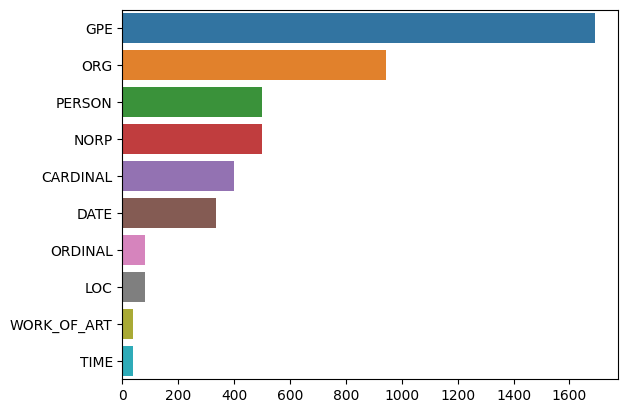

In [117]:
y , x = map(list , zip(*ner_map))
sns.barplot(x = x , y = y)

In [126]:
def get_top_ner(text , ent):
    doc = nlp(text)
    return [x.text for x in doc.ents if x.label_ == ent]

In [127]:
gpe = comments['0'].apply(lambda x: get_top_ner(x , "GPE"))

In [129]:
gpe_map = {}
for sub in gpe:
    for name in sub:
        if(name not in gpe_map): gpe_map[name] = 0
        gpe_map[name]+= 1
gpe_map = sorted(gpe_map.items() , key = lambda x: x[1] , reverse = True)[:10]

In [130]:
y , x = map(list , zip(*gpe_map))

<Axes: >

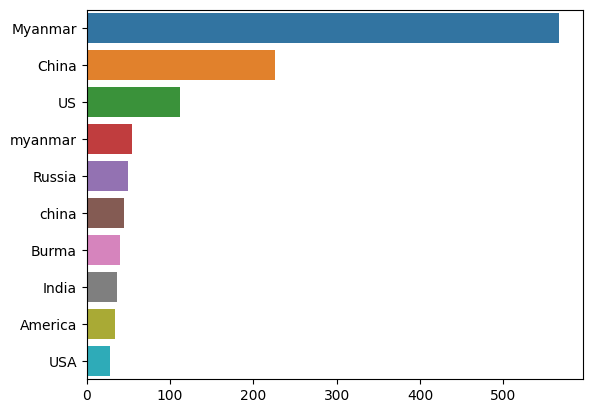

In [131]:
sns.barplot(x = x , y = y)